In [99]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [100]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)



In [101]:
X, y = mnist["data"], mnist["target"]


Saving figure some_digit_plot


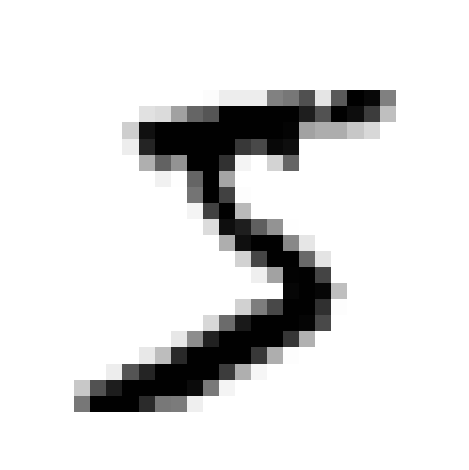

In [136]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()



In [103]:
y = y.astype(np.uint8)


In [104]:
# Create train, test set

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [105]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits y_test_5 = (y_test == 5)
y_test_5 = (y_test == 5)
print(y_test_5)

[False False False ... False  True False]


In [106]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])


array([ True])

In [107]:
sgd_clf_pred =  sgd_clf.decision_function([some_digit])
print(sgd_clf_pred)

[2164.22030239]


In [108]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [109]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

# 53892 of theme were correctly classified as non-5s (true negative) 

# 687 wrong as 5s (false positive)

# 1891 wrong as non-5s (false negative)

# 3530 correectly as 5s (true positive)

# True negative: Đoán đúng không phải là 5

# False negative: Đoán là không phải 5 nhưng đoán là 5

# True positive: Đoán đúng là 5

# False positive: Đoán là 5 nhưng đoán không phải 5


array([[53892,   687],
       [ 1891,  3530]])

In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_5, y_train_pred)

recall = recall_score(y_train_5, y_train_pred)

f1 = f1_score(y_train_5, y_train_pred)


print("Precision: ", precision)

print("Recall: ", recall)

print("F1: ", f1)

Precision:  0.8370879772350012
Recall:  0.6511713705958311
F1:  0.7325171197343847


In [111]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
recisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [112]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)




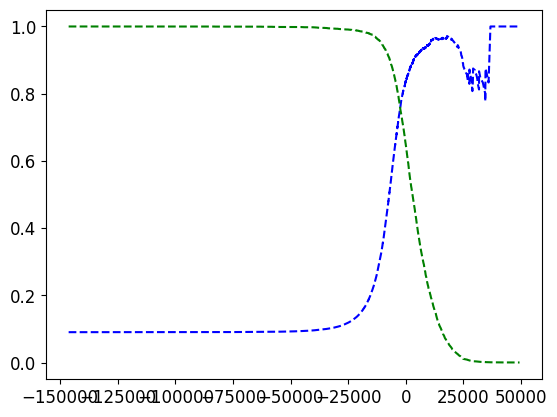

In [113]:
def plot_precisions_recalls_vs_threshold(precisions, recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plot_precisions_recalls_vs_threshold(precisions, recalls, thresholds)
plt.show()

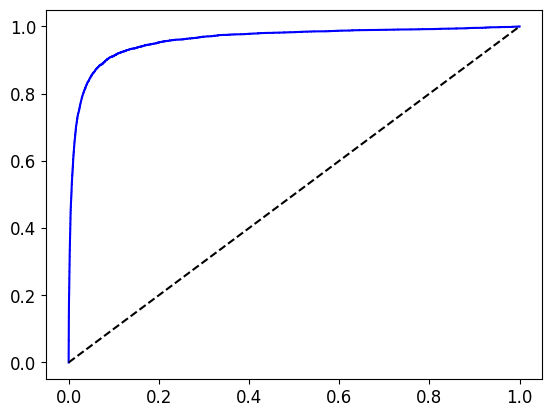

In [114]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.plot(fpr, tpr, "b-")
plt.plot([0, 1], [0,1], "k--")

plt.show()

In [115]:
# Train SGD 

sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [120]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [122]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)


[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


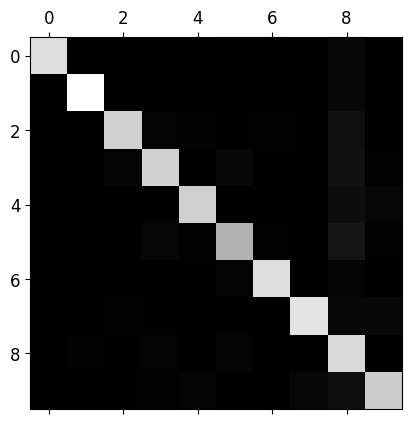

In [125]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [129]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

norm_conf_mx = conf_mx / row_sums


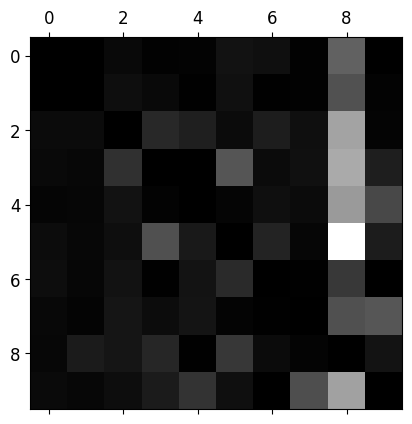

In [131]:
# fill diagonal to 0
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Row present actual classes
# Column present predicted class

AxisError: axis 1 is out of bounds for array of dimension 1

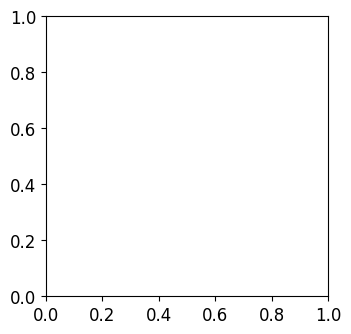

In [140]:
cl_a, cl_b = 3, 5

def plot_digits(instances, images_per_row=5, **options):
    size = 28  # Kích thước của mỗi ảnh chữ số (28x28 pixel)
    images_per_row = min(len(instances), images_per_row)  # Số lượng ảnh trên mỗi hàng
    n_rows = (len(instances) - 1) // images_per_row + 1  # Tính toán số hàng cần thiết
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    
    for row in range(n_rows):
        rimages = instances[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages.reshape( size), axis=1))
    image = np.concatenate(row_images, axis=0)

    plt.imshow(image, cmap="gray", **options)
    plt.axis("off")


X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)

plt.show()